In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc, roc_curve , confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
df = pd.read_csv('./drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().mean()*100

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(200, 6)

In [8]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [9]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [10]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [11]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [12]:
df['Sex'] = df['Sex'].replace('F', 0)
df['Sex'] = df['Sex'].replace('M', 1)

In [13]:
df['BP'] = df['BP'].replace('LOW', 0)
df['BP'] = df['BP'].replace('NORMAL', 1)
df['BP'] = df['BP'].replace('HIGH', 2)

In [14]:
df['Cholesterol'] = df['Cholesterol'].replace('NORMAL', 0)
df['Cholesterol'] = df['Cholesterol'].replace('HIGH', 1)

In [15]:
df['Drug'] = df['Drug'].replace('drugA', 0)
df['Drug'] = df['Drug'].replace('drugB', 1)
df['Drug'] = df['Drug'].replace('drugC', 2)
df['Drug'] = df['Drug'].replace('drugX', 3)
df['Drug'] = df['Drug'].replace('DrugY', 4)

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4


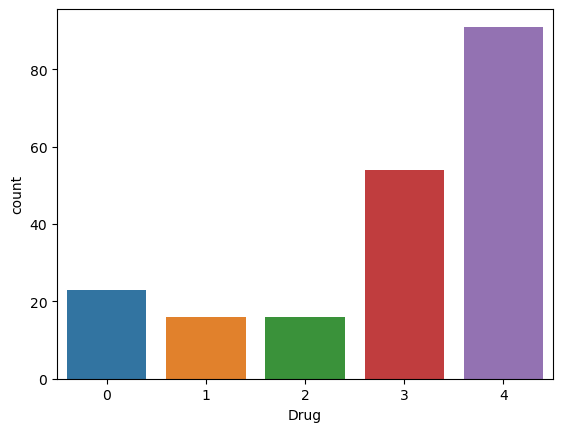

In [17]:
sns.countplot(data = df, x  = 'Drug')
plt.show()

In [18]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
smote = SMOTE()

In [20]:
x_smote, y_smote = smote.fit_resample(x, y)

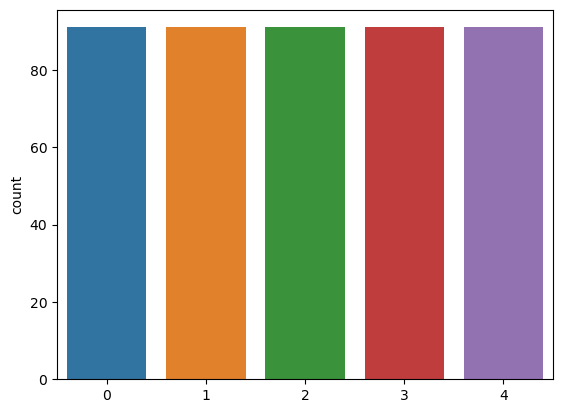

In [21]:
sns.countplot(data = df, x  = y_smote)
plt.show()

In [22]:
models =models = {
   'LogisticRegression' :LogisticRegression(),
   'RandomForestClassifier' :RandomForestClassifier(random_state= 42),
   'DecisionTreeClassifier' :DecisionTreeClassifier(random_state= 42),
   'AdaBoostClassifier' :AdaBoostClassifier(random_state= 42),
   'GradientBoostingClassifier' :GradientBoostingClassifier(random_state= 42),
   'HistGradientBoostingClassifier' :HistGradientBoostingClassifier(random_state= 42),
   'KNeighborsClassifier':KNeighborsClassifier()
}

In [23]:
for name, model in models.items():
    scores = cross_val_score(model, x_smote, y_smote, scoring= 'accuracy', cv = 10, n_jobs= -1)
    print("Cross validation with : {}".format(name))
    print("Mean score is :", np.mean(scores))
    print('*'*100)

Cross validation with : LogisticRegression
Mean score is : 0.9385507246376811
****************************************************************************************************
Cross validation with : RandomForestClassifier
Mean score is : 1.0
****************************************************************************************************
Cross validation with : DecisionTreeClassifier
Mean score is : 1.0
****************************************************************************************************
Cross validation with : AdaBoostClassifier
Mean score is : 0.5956521739130435
****************************************************************************************************
Cross validation with : GradientBoostingClassifier
Mean score is : 0.9978260869565216
****************************************************************************************************
Cross validation with : HistGradientBoostingClassifier
Mean score is : 0.9934782608695653
*****************************

In [24]:
x = x_smote

In [25]:
y = label_binarize(y_smote, classes=[0,1,2,3,4])
n_classes = 5

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, shuffle= True, random_state= 42)

In [27]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=42))

In [28]:
y_score = model.fit(x_train, y_train).predict_proba(x_test)

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

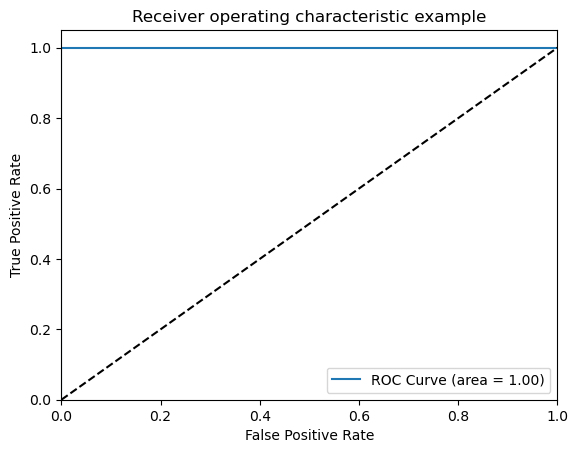

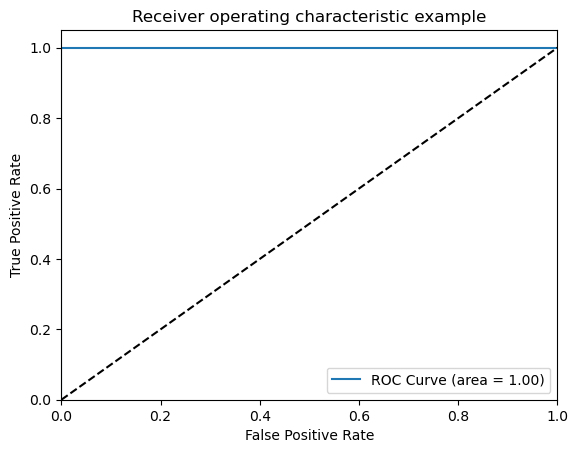

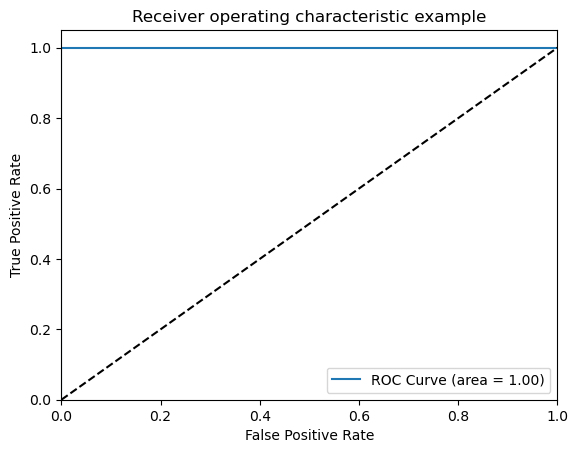

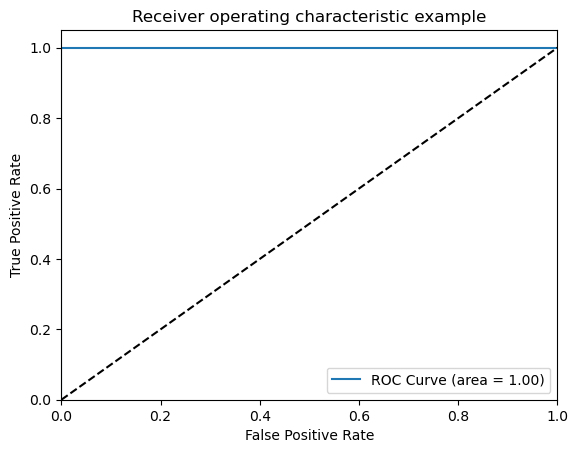

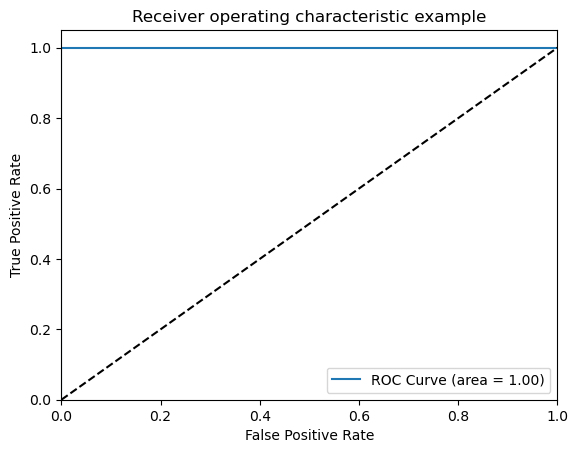

In [30]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label = 'ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc = "lower right")
    plt.show()

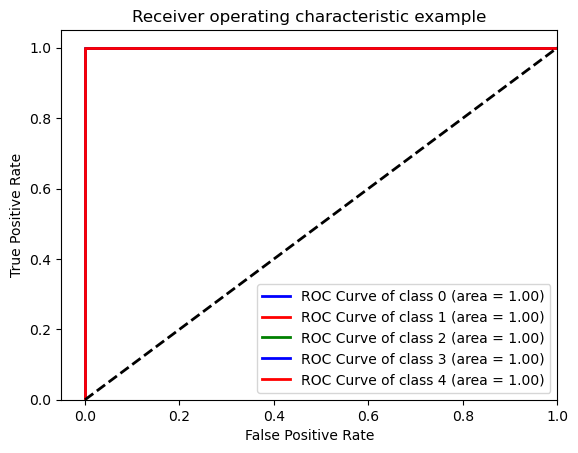

In [31]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = 2 ,
             label = 'ROC Curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0,1], [0,1], 'k--', lw = lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc = "lower right")
plt.show()             

In [32]:
pickle.dump(model,open('MODEL1.pkl', 'wb'))